In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [8]:
x_train=pd.read_csv(r'C:\Users\dell\Downloads\Diabetes_XTrain.csv')
y_train=pd.read_csv(r'C:\Users\dell\Downloads\Diabetes_YTrain.csv')
print(x_train.shape,y_train.shape)
y_train

(576, 8) (576, 1)


,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


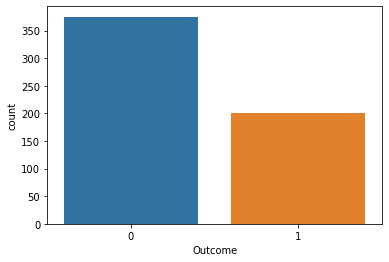

In [11]:
import seaborn as sns
sns.countplot(x='Outcome',data=y_train)


In [26]:
d=np.array(x_train.columns)
values=[]
for i in d:
    values.append(x_train[i].unique().sum())

In [27]:
values

[122, 16724, 3361, 1530, 28080, 7440.7, 226.796, 2428]

<BarContainer object of 8 artists>

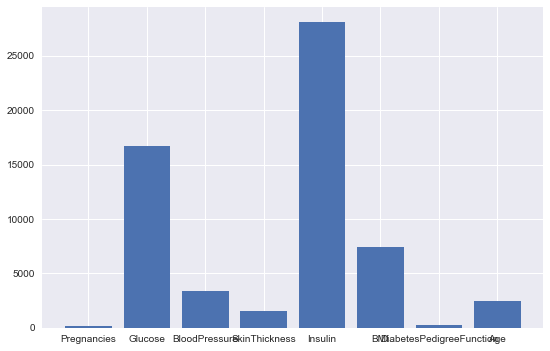

In [38]:
plt.style.use('seaborn')
plt.bar(d,values)

In [84]:
split=int(0.7*x_train.shape[0])
print(split)

403


In [85]:
xtrain=x_train.values[:split,:9]
ytrain=y_train.values[:split,:1]
xtest=x_train.values[split:,:9]
ytest=y_train.values[split:,:1]
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(403, 8) (403, 1)
(173, 8) (173, 1)


In [88]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def KNN(X,Y,q,k=5):
    
    values = []             
    m = X.shape[0]  
    
    for i in range(m):
        d = distance(q,X[i])     
        values.append((d,Y[i]))    
    values = sorted(values)
    values = values[:k]    
    values = np.array(values)
    new_values = np.unique(values,return_counts=True)    
    index = new_values[1].argmax()
    prediction = new_values[0][index]
    return prediction
    

In [89]:
y_pred=[]
for i in range(xtest.shape[0]):
    y_pred.append(KNN(xtrain,ytrain,xtest[i]))
print((((y_pred==ytest).sum())/ytest.shape[0]))

0.7109826589595376


In [96]:
Y=[]
d_test=pd.read_csv(r'C:\Users\dell\Downloads\Diabetes_XTest.csv')
X=d_test.values
for i in range(X.shape[0]):
    Y.append(KNN(x_train.values,y_train.values,X[i]))
Y=pd.DataFrame(Y)
Y

,0
0,1
1,0
2,0
3,0
4,0
...,...
187,1
188,0
189,1
190,1


In [99]:
d_test['Outcome']=Y

In [100]:
d_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,180,90,26,90,36.5,0.314,35,1
1,2,93,64,32,160,38.0,0.674,23,0
2,2,114,68,22,0,28.7,0.092,25,0
3,13,76,60,0,0,32.8,0.180,41,0
4,1,80,74,11,60,30.0,0.527,22,0
...,...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42,1
188,3,130,64,0,0,23.1,0.314,22,0
189,0,162,76,36,0,49.6,0.364,26,1
190,12,84,72,31,0,29.7,0.297,46,1


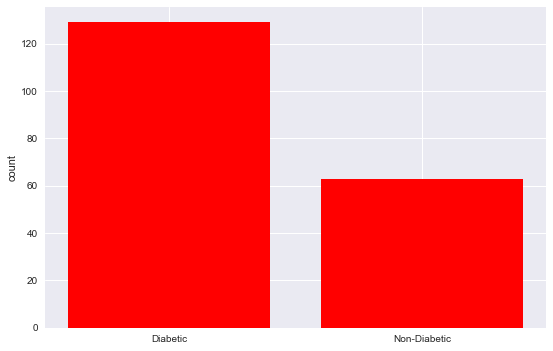

In [122]:
dia=np.unique(d_test['Outcome'],return_counts=True)
y=np.arange(len(['Diabetic','Non-Diabetic']))
plt.bar(y,dia[1],color='red')
plt.xticks(y,['Diabetic','Non-Diabetic'])
plt.ylabel('count')
plt.show()